In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Courses_data.csv')

# Pre-Processing & Cleaning


In [3]:
cleaned_data = df.copy()

#cleaned_data.drop('Courses', axis=1, inplace=True)


## Replace Name

In [4]:
degree_unique = cleaned_data['Study Program'].unique()

print(degree_unique)

['B.Sc. Applied Cognitive and Media Science  PO14 - B-KM-14'
 'B.Sc. Applied Cognitive and Media Science  PO19 - B-KM-19'
 'B.Sc. Applied Computer Sience  PO12 - B-AI-12'
 'B.Sc. Applied Computer Sience  PO19 - B-AI-19'
 'B.Sc. Civil Engineering  PO16 - B-BIW-16'
 'B.Sc. Civil Engineering  PO19 - B-BIW-19'
 'B.Sc. Computer Engineering (Communications)  PO15 - B-CE(Com)-15'
 'B.Sc. Computer Engineering (Software Engineering)  PO15 - B-CE(SE)-15'
 'B.Sc. Computer Engineering (Communications)  PO19 - B-CE(Com)-19'
 'B.Sc. Computer Engineering (Software Engineering)  PO19 - B-CE(SE)-19'
 'B.Sc. Electrical and Electronic Engineering  PO15 - B-EEE-15'
 'B.Sc. Electrical and Electronic Engineering  PO19 - B-EEE-19'
 'B.Sc. Electrical Engineering and Information Technology  PO12 - B-EIT-12'
 'B.Sc. Electrical Engineering and Information Technology  PO19 - B-EIT-19'
 'B.Sc. Industrial Engineering (Electrical Power Technology and Management)  PO09 - B-WI(EET)-09'
 'B.Sc. Industrial Engineering (

In [5]:

rem = [0,2,4,6,7,10,12,14,15,16,20,22,23,24,25,26,27,28,29,38,40,42,45]
replace_name = degree_unique[rem]
tobe_replaced = cleaned_data[cleaned_data['Study Program'].isin(replace_name)] 

wanted = cleaned_data[~cleaned_data['Study Program'].isin(replace_name)] 
wanted_name= wanted['Study Program'].unique()

wanted_name= np.delete(wanted_name,[22])

count=0
for i in replace_name:
    cleaned_data['Study Program'].replace(to_replace=i, value=wanted_name[count], inplace=True)
    count+=1


In [6]:
cleaned_data['Study Program'].unique()

array(['B.Sc. Applied Cognitive and Media Science  PO19 - B-KM-19',
       'B.Sc. Applied Computer Sience  PO19 - B-AI-19',
       'B.Sc. Civil Engineering  PO19 - B-BIW-19',
       'B.Sc. Computer Engineering (Communications)  PO19 - B-CE(Com)-19',
       'B.Sc. Computer Engineering (Software Engineering)  PO19 - B-CE(SE)-19',
       'B.Sc. Electrical and Electronic Engineering  PO19 - B-EEE-19',
       'B.Sc. Electrical Engineering and Information Technology  PO19 - B-EIT-19',
       'B.Sc. Industrial Engineering (Electrical Power Technology and Management)  PO19 - B-WI(EET)-19',
       'B.Sc. Industrial Engineering (Information Technology and Management)  PO19 - B-WI(IT)-19',
       'B.Sc. Industrial Engineering (Mechanical Engineering and Management)  PO19 - B-WI(MB)-19',
       'B.Sc. Lehramt Berufskolleg Bautechnik (große berufliche Fachrichtung Bautechnik mit kleiner beruflicher Fachrichtung Tiefbautechnik)  PO19 - LA-B-BT-19',
       'B.Sc. Mechanical Engineering  PO19 - B-ME-1

In [7]:
cleaned_data.to_csv('cleaned_data.csv')

## Text Cleaning

In [40]:
import re
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import dill
import pickle
import marshal




def prep_desc(a : str):
    ''' clean description to be more managable '''
    # take out special characters
    a = re.sub('[^A-Za-z0-9]+', ' ', a)
    # take out single characters
    a = re.sub(r'\s+[a-zA-Z]\s+', ' ', a)
    # take out single characters from start
    a = re.sub(r'\^[a-zA-Z]\s+', ' ', a)
    # take out double spaces
    a = re.sub(r'\s+', ' ', a, flags=re.I)
    # change all to lower case
    a = a.lower()
    # tokenize
    words = word_tokenize(a)
    # remove punctuation
    words_no_punc= []
    for w in words:
        if w.isalpha():
            words_no_punc.append(w.lower())
    # remove stopwords
    clean_words = []
    for w in words_no_punc:
        if w not in stopwords.words("english"):
            clean_words.append(w)
    
    
    a = ' '.join(clean_words)
    
    return a

code_string = marshal.dumps(prep_desc.func_code)
pickle.dump(code_string, open("cleaning.pkl", "wb"))

    

AttributeError: 'function' object has no attribute 'func_code'

In [9]:
cleaned_data.iloc[55]['Description']

'The theory of computability and complexity is an important foundation of computer science. Here we are interested in questions such as: what can we compute? How expensive is such a computation? We will also treat the P-NP problem  the most significant unsolved problem in theoretical computer science. The course will teach fundamental knowledge in the areas of computability and complexity  in particular:  Computability (Turing machines  intuitive notion of computability  Church‘s thesis  LOOP-/WHILE-/GOTO-programs  primitive recursive and mu-recursive functions  Ackermann function  halting problem  undecidability  reductions  Post‘s correspondence problem  further undecidable problems) Complexity (complexity classes  P-NP problem  NP-completeness  SAT  further NP-complete problems) '

In [10]:
cleaned_data['Description']=cleaned_data['Description'].apply(prep_desc)

In [11]:
cleaned_data.iloc[55]['Description']

'theory computability complexity important foundation computer science interested questions compute expensive computation also treat np problem significant unsolved problem theoretical computer science course teach fundamental knowledge areas computability complexity particular computability turing machines intuitive notion computability church thesis loop goto programs primitive recursive mu recursive functions ackermann function halting problem undecidability reductions post correspondence problem undecidable problems complexity complexity classes np problem np completeness sat np complete problems'

In [12]:
cleaned_data.head()

,Study Program,Courses,Description
0,B.Sc. Applied Cognitive and Media Science PO1...,General Psychology: Perception Cognition and ...,course conveys phenomena theories neurobiologi...
1,B.Sc. Applied Cognitive and Media Science PO1...,Informatische Grundlagen neuer Medien und Komm...,course offers introduction basic concepts meth...
2,B.Sc. Applied Cognitive and Media Science PO1...,Statistics I: Introduction to research methods,course provides introduction quantitative meth...
3,B.Sc. Applied Cognitive and Media Science PO1...,Business Law,lecture conveys basic knowledge civil commerci...
4,B.Sc. Applied Cognitive and Media Science PO1...,Digital Media,course focused three main areas development mu...


In [13]:
cleaned_data.to_csv('cleaned_data.csv')

# Document-Term Matrix

## Group cleaned data by Degree

In [14]:
cleaned_data_grouped = cleaned_data.copy()

In [15]:
cleaned_data_grouped = cleaned_data_grouped.groupby(cleaned_data_grouped['Study Program'])['Description'].apply(lambda x: ' '.join(x)).reset_index()
cleaned_data_grouped.index = cleaned_data_grouped['Study Program']
cleaned_data_grouped.drop(columns=['Study Program'], inplace =True)
cleaned_data_grouped.head()

,Description
Study Program,
B.Sc. Applied Cognitive and Media Science PO19 - B-KM-19,course conveys phenomena theories neurobiologi...
B.Sc. Applied Computer Sience PO19 - B-AI-19,lecture use state art programming languages g ...
B.Sc. Civil Engineering PO19 - B-BIW-19,systems forces internal forces friction mechan...
B.Sc. Computer Engineering (Communications) PO19 - B-CE(Com)-19,course covers fundamentals computer engineerin...
B.Sc. Computer Engineering (Software Engineering) PO19 - B-CE(SE)-19,course covers fundamentals computer engineerin...


In [16]:
cleaned_data_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, B.Sc. Applied Cognitive and Media Science  PO19 - B-KM-19 to B.Sc. Structural Engineering  PO19 - B-SE-19
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  24 non-null     object
dtypes: object(1)
memory usage: 384.0+ bytes


## Creating DTM using CountVectorizer

In [17]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer()
data_cv = cv.fit_transform(cleaned_data_grouped['Description'])

dtm = pd.DataFrame(data_cv.toarray(), columns = cv.get_feature_names())
dtm.index = cleaned_data_grouped.index
dtm

,ablation,able,absorber,absorbers,absorption,abstract,abstraction,ac,academic,acc,...,xml,year,years,yield,young,zero,zeros,ztv,zum,zuteach
Study Program,,,,,,,,,,,,,,,,,,,,,
B.Sc. Applied Cognitive and Media Science PO19 - B-KM-19,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
B.Sc. Applied Computer Sience PO19 - B-AI-19,0,0,0,0,0,8,6,0,0,0,...,2,0,0,0,0,2,0,0,0,2
B.Sc. Civil Engineering PO19 - B-BIW-19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,0,0
B.Sc. Computer Engineering (Communications) PO19 - B-CE(Com)-19,0,2,0,0,0,0,2,4,2,0,...,2,0,1,0,0,2,0,0,0,0
B.Sc. Computer Engineering (Software Engineering) PO19 - B-CE(SE)-19,0,2,0,0,0,8,4,4,2,0,...,2,0,0,0,0,2,0,0,0,0
B.Sc. Electrical Engineering and Information Technology PO19 - B-EIT-19,0,0,0,0,3,0,0,5,0,0,...,1,0,0,0,0,0,0,0,0,0
B.Sc. Electrical and Electronic Engineering PO19 - B-EEE-19,0,2,0,0,2,0,2,4,2,0,...,1,0,0,0,0,0,0,0,0,0
B.Sc. Industrial Engineering (Electrical Power Technology and Management) PO19 - B-WI(EET)-19,0,0,0,0,0,0,0,6,2,0,...,0,0,0,0,0,0,0,0,2,0
B.Sc. Industrial Engineering (Information Technology and Management) PO19 - B-WI(IT)-19,0,0,0,0,0,0,2,6,2,0,...,1,0,0,0,0,0,0,0,2,0


# Data Analysis

## Count how many description available for each degree

<AxesSubplot:xlabel='Study Program', ylabel='count'>

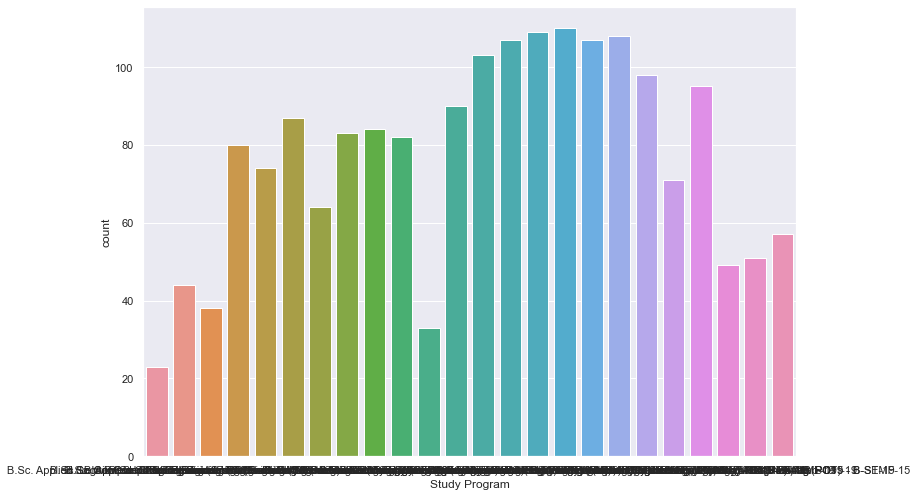

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.countplot(x='Study Program', data=cleaned_data)

## Most Common Words for each degree

### Finding Common Words

In [19]:
# transpose dtm

dtmT = dtm.transpose()
dtmT

Study Program,B.Sc. Applied Cognitive and Media Science PO19 - B-KM-19,B.Sc. Applied Computer Sience PO19 - B-AI-19,B.Sc. Civil Engineering PO19 - B-BIW-19,B.Sc. Computer Engineering (Communications) PO19 - B-CE(Com)-19,B.Sc. Computer Engineering (Software Engineering) PO19 - B-CE(SE)-19,B.Sc. Electrical Engineering and Information Technology PO19 - B-EIT-19,B.Sc. Electrical and Electronic Engineering PO19 - B-EEE-19,B.Sc. Industrial Engineering (Electrical Power Technology and Management) PO19 - B-WI(EET)-19,B.Sc. Industrial Engineering (Information Technology and Management) PO19 - B-WI(IT)-19,B.Sc. Industrial Engineering (Mechanical Engineering and Management) PO19 - B-WI(MB)-19,...,B.Sc. Mechanical Engineering (General Mechanical Engineering) PO19 - B-MB(AMB)-19,B.Sc. Mechanical Engineering (Mechatronics) PO19 - B-MB(ME)-19,B.Sc. Mechanical Engineering (Metallurgy and Metal Processing) PO19 - B-MB(MVA)-19,B.Sc. Mechanical Engineering (Product Engineering) PO19 - B-MB(PE)-19,B.Sc. Mechanical Engineering (Ship and Offshore Technology) PO19 - B-MB(SOT)-19,B.Sc. Medical Engineering PO19 - B-MedT-19,B.Sc. Metallurgy and Metal Forming PO19 - B-MMF-19,B.Sc. NanoEngineering PO19 - B-Nano-19,B.Sc. Steel Technology and Metal Forming PO15 - B-STMF-15,B.Sc. Structural Engineering PO19 - B-SE-19
ablation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
able,0,0,0,2,2,0,2,0,0,1,...,2,3,2,1,2,5,4,0,2,2
absorber,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absorbers,0,0,0,0,0,0,0,0,0,0,...,2,1,1,1,1,0,0,0,0,0
absorption,0,0,0,0,0,3,2,0,0,0,...,2,1,1,2,2,0,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zero,0,2,0,2,2,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
zeros,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,0,2,0,1,0
ztv,0,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zum,0,0,0,0,0,0,0,2,2,2,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# using Tansposed dtm
top_dict = {}
for c in dtmT.columns:
    top = dtmT[c].sort_values(ascending=False).head(50)
    top_dict[c] = list(zip(top.index, top.values))
    
    
top_dict


{'B.Sc. Applied Cognitive and Media Science  PO19 - B-KM-19': [('methods', 25),
  ('analysis', 22),
  ('course', 21),
  ('design', 20),
  ('lecture', 20),
  ('experimental', 18),
  ('user', 14),
  ('interaction', 14),
  ('data', 14),
  ('computer', 14),
  ('research', 12),
  ('systems', 12),
  ('basic', 11),
  ('programming', 11),
  ('foundations', 10),
  ('psychological', 10),
  ('interfaces', 10),
  ('concepts', 10),
  ('media', 10),
  ('psychology', 10),
  ('topics', 9),
  ('development', 8),
  ('evaluation', 8),
  ('empirical', 8),
  ('field', 8),
  ('application', 8),
  ('web', 8),
  ('motivation', 8),
  ('process', 8),
  ('communication', 8),
  ('usability', 8),
  ('models', 7),
  ('aspects', 7),
  ('techniques', 7),
  ('functions', 7),
  ('contents', 7),
  ('current', 6),
  ('project', 6),
  ('regarding', 6),
  ('basics', 6),
  ('multimedia', 6),
  ('hypotheses', 6),
  ('engineering', 6),
  ('introduction', 6),
  ('content', 6),
  ('digital', 6),
  ('theories', 6),
  ('well', 6)

In [21]:
for degree, top_words in top_dict.items():
    print(degree)
    print(', '.join([word for word, count in top_words[0:29]]))
    print('---')

B.Sc. Applied Cognitive and Media Science  PO19 - B-KM-19
methods, analysis, course, design, lecture, experimental, user, interaction, data, computer, research, systems, basic, programming, foundations, psychological, interfaces, concepts, media, psychology, topics, development, evaluation, empirical, field, application, web, motivation, process
---
B.Sc. Applied Computer Sience  PO19 - B-AI-19
programming, software, logic, computer, languages, design, lecture, development, basic, concepts, course, systems, important, data, theory, functions, types, database, problem, object, contents, language, applications, introduction, algorithms, fundamentals, particular, practical, system
---
B.Sc. Civil Engineering  PO19 - B-BIW-19
water, basics, design, building, construction, materials, simple, work, calculation, structure, material, road, treatment, concepts, coordinates, management, foundations, waste, bearing, processes, structures, presentation, stress, measurement, mechanical, differentia

## Creating WordCloud

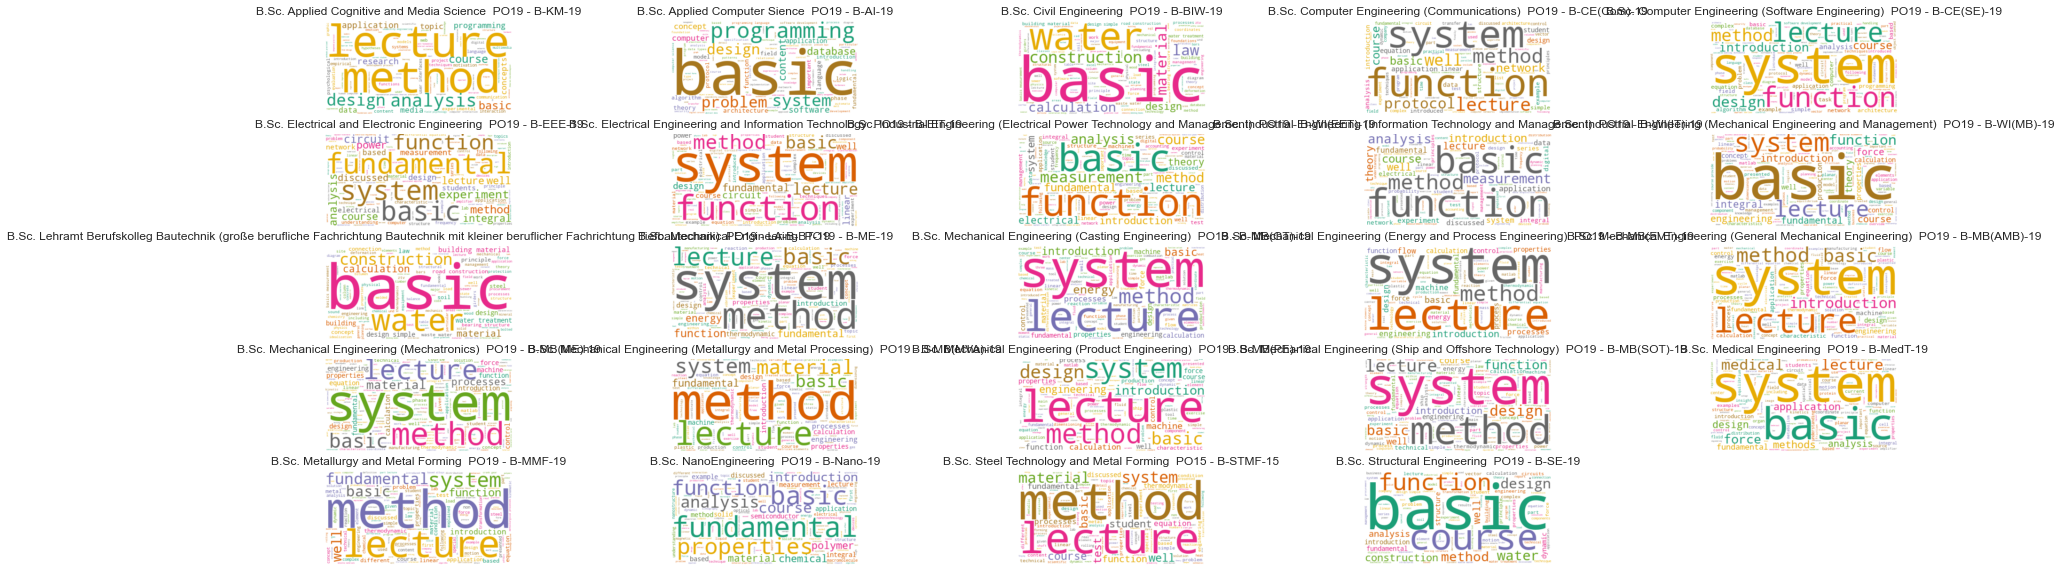

In [22]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

plt.rcParams['figure.figsize'] = [30,10]

degrees = cleaned_data['Study Program'].unique()

for index, degree in enumerate(dtmT.columns):
    wc.generate(cleaned_data_grouped.Description[degree])
    
    plt.subplot(5 ,5,index +1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(degrees[index])
    
    
plt.show()


# using Transposed dtm



In [23]:
cleaned_data_grouped.Description['B.Sc. Industrial Engineering (Mechanical Engineering and Management)  PO19 - B-WI(MB)-19']

'introduction basics coherences accounting entering accounting transactions drawing balance sheet well profit loss statement central topicsoft lecture periodic table elements hydrogen main group chemical binding intermolecular interaction reaction equations stoichiometry kinetics energetics chemical reactions basic knowledge metals production characteristics corrosion chemical equilibrium basic concepts focus acid base equilibria electrochemical processes electrolysis galvanic cells polymers production characteristics application functional materials optical electronic magnetic mechanical properties industrial synthesis routes exemplary examples integrated approaches chemical industry main topics lecture general geometry projections interpenetrating bodies real size basic principles technical drawings assembly drawings manufacturing drawings addition operating principles basic machine elements imparted lecture provides comprehensive introduction key business functions management perspe

### TODO get words that is not needed to extend for stopwords

# Training

## features extraction using tf-idf

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(analyzer = 'word')
X = vectorizer.fit_transform(cleaned_data['Description'])
Y = cleaned_data['Study Program']
feat = vectorizer.get_feature_names()

In [25]:
'''
for i in range(len(cleaned_data['Description'])):
    for j in range(len(feat)):
        if X[i,j]!=0.0:
            print(i , feat[j], X[i,j])
            
'''

"\nfor i in range(len(cleaned_data['Description'])):\n    for j in range(len(feat)):\n        if X[i,j]!=0.0:\n            print(i , feat[j], X[i,j])\n            \n"

In [26]:
print(len(cleaned_data['Description']))

1847


## Recommend using rfc

In [27]:
from sklearn.ensemble import RandomForestClassifier

text_classifier_rfc = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier_rfc.fit(X, Y)

RandomForestClassifier(random_state=0)

In [28]:
W = str('Graduates with a Master degree in Electrical Engineering, Information Technology, and Computer Engineering with a specialization in Computer Engineering will have acquired a high level of specialization, a research-oriented view, and in-depth, domain-specific knowledge at a professional level in the areas of computer technology, information/communication technology, and/or media technology. They will be able to understand how the different components of a complex system are connected and functionally combined, and they will be able to apply theoretical concepts of system identification, modelling, and optimization in order to further develop such systems on their own, particularly by hardware/software co-design. Examples of such systems include general computer systems, media systems (image/video/speech/audio processing, recognition, and coding), automated and embedded systems, robotics, automotive systems, and many more. In the given field, the graduates will be able')
#W= str('i like math coding programming and logic')
#W = str('course conveys phenomena theories neurobiological foundations well fundamental current studies regarding following topics psychology empirical science foundations neuroanatomy perception attention behavior motor skills executive functions learning memory thinking problem solving decision making')

In [29]:
W=prep_desc(W)
print(W)

graduates master degree electrical engineering information technology computer engineering specialization computer engineering acquired high level specialization research oriented view depth domain specific knowledge professional level areas computer technology information communication technology media technology able understand different components complex system connected functionally combined able apply theoretical concepts system identification modelling optimization order develop systems particularly hardware software co design examples systems include general computer systems media systems image video speech audio processing recognition coding automated embedded systems robotics automotive systems many given field graduates able


In [30]:
W = vectorizer.transform([prep_desc(W)])
prediction = text_classifier_rfc.predict(W)
print(prediction)

['B.Sc. Medical Engineering  PO19 - B-MedT-19']


## Recommend using SVM

In [31]:
from sklearn import svm

text_classifier_svm = svm.SVC(kernel='linear')
text_classifier_svm.fit(X, Y)

SVC(kernel='linear')

In [32]:
prediction = text_classifier_rfc.predict(W)
print(prediction)

['B.Sc. Medical Engineering  PO19 - B-MedT-19']


## Recommend using Cos Sim

In [33]:
cleaned_data.iloc[0]['Description']

'course conveys phenomena theories neurobiological foundations well fundamental current studies regarding following topics psychology empirical science foundations neuroanatomy perception attention behavior motor skills executive functions learning memory thinking problem solving decision making'

In [34]:
from sklearn.metrics.pairwise import cosine_similarity



cosine_sim = cosine_similarity(X, W)

In [35]:
print(cosine_sim)

[[0.        ]
 [0.21934917]
 [0.04978744]
 ...
 [0.        ]
 [0.08824675]
 [0.06014004]]


In [36]:
import heapq

top_ten = heapq.nlargest(10 , cosine_sim)
print(top_ten)

[array([0.23108183]), array([0.23108183]), array([0.21934917]), array([0.21934917]), array([0.18630125]), array([0.18630125]), array([0.18630125]), array([0.18630125]), array([0.17432305]), array([0.17432305])]


In [37]:
print(cosine_sim[1])

[0.21934917]


In [38]:

for i in range(len(cosine_sim)):
    for j in top_ten:
        if cosine_sim[i]==j:
            print(cleaned_data.iloc[i]['Study Program'] , j)


B.Sc. Applied Cognitive and Media Science  PO19 - B-KM-19 [0.21934917]
B.Sc. Applied Cognitive and Media Science  PO19 - B-KM-19 [0.21934917]
B.Sc. Applied Cognitive and Media Science  PO19 - B-KM-19 [0.21934917]
B.Sc. Applied Cognitive and Media Science  PO19 - B-KM-19 [0.21934917]
B.Sc. Computer Engineering (Communications)  PO19 - B-CE(Com)-19 [0.17432305]
B.Sc. Computer Engineering (Communications)  PO19 - B-CE(Com)-19 [0.17432305]
B.Sc. Computer Engineering (Software Engineering)  PO19 - B-CE(SE)-19 [0.17432305]
B.Sc. Computer Engineering (Software Engineering)  PO19 - B-CE(SE)-19 [0.17432305]
B.Sc. Computer Engineering (Communications)  PO19 - B-CE(Com)-19 [0.17432305]
B.Sc. Computer Engineering (Communications)  PO19 - B-CE(Com)-19 [0.17432305]
B.Sc. Computer Engineering (Software Engineering)  PO19 - B-CE(SE)-19 [0.17432305]
B.Sc. Computer Engineering (Software Engineering)  PO19 - B-CE(SE)-19 [0.17432305]
B.Sc. Electrical and Electronic Engineering  PO19 - B-EEE-19 [0.17432305